In [1]:
using Rays

In [2]:
# Define the scene
scene = Rays.Scene()

# Define a camera
camera = Rays.Camera(; screen_res = (500, 1000), screen_size = [0.05f0, 0.1f0])
push!(scene, camera)

# Define some cubes
n_cubes = 4
for i in 1:n_cubes
    center = zeros(Float32, 3)
    center[2] = (i - (n_cubes+1)/2)/1.3
    cube = Rays.Cube(0.25f0)
    transform = Rays.translation(center)
    push!(scene, cube; transform)
end

# Let the camera look towards the origin
Rays.look_at!(camera, zeros(Float32, 3), 3.0f0, 0.0f0, 1.0f0)

# Set how shape brightness drops of with distance to the camera
# in a default way based on the shapes in the scene relative to the camera.
camera = Rays.set_dropoff_curve_default!(scene, camera);

In [3]:
using Images: colorview, RGB, N0f8

function view_canvas(camera)
    canvas_RGB = RGB{N0f8}.([view(camera.canvas, channel, :, :) for channel = 1:3]...)
    colorview(RGB, canvas_RGB)
end

view_canvas (generic function with 1 method)

## Apply available textures

In [4]:
julia_green = Float32[0.22, 0.596, 0.149]
julia_purple = Float32[0.584, 0.345, 0.698]
julia_red = Float32[0.796, 0.235, 0.2]
julia_colors = hcat(julia_green, julia_purple, julia_red)

function colorfield_cube_2!(color::AbstractVector{F}, loc_int::AbstractVector{F})::Nothing where {F <: AbstractFloat}
    s = sum(loc_int)
    f = cos(10*s)^2
    for i in 1:3
        color[i] = f * julia_green[i] + (1-f) * julia_purple[i]
    end
    return nothing
end

loc_int_y_min = Inf
loc_int_y_max = -Inf

function colorfield_cube_3!(color::AbstractVector{F}, loc_int::AbstractVector{F})::Nothing where {F <: AbstractFloat}
    for i in 1:3
        color[i] = 4 * abs(loc_int[i])
    end
    global loc_int_y_min = min(loc_int_y_min, loc_int[2])
    global loc_int_y_max = max(loc_int_y_max, loc_int[2])
    return nothing
end

# From left to right
Rays.set_texture!(scene, :cube, Rays.IntegerMappingTexture(julia_colors))
Rays.set_texture!(scene, :cube_1, Rays.UniformTexture(Float32[0.0, 1.0, 0.0])) # Green
Rays.set_texture!(scene, :cube_2, Rays.ColorFieldTexture(colorfield_cube_2!))
Rays.set_texture!(scene, :cube_3, Rays.ColorFieldTexture(colorfield_cube_3!))

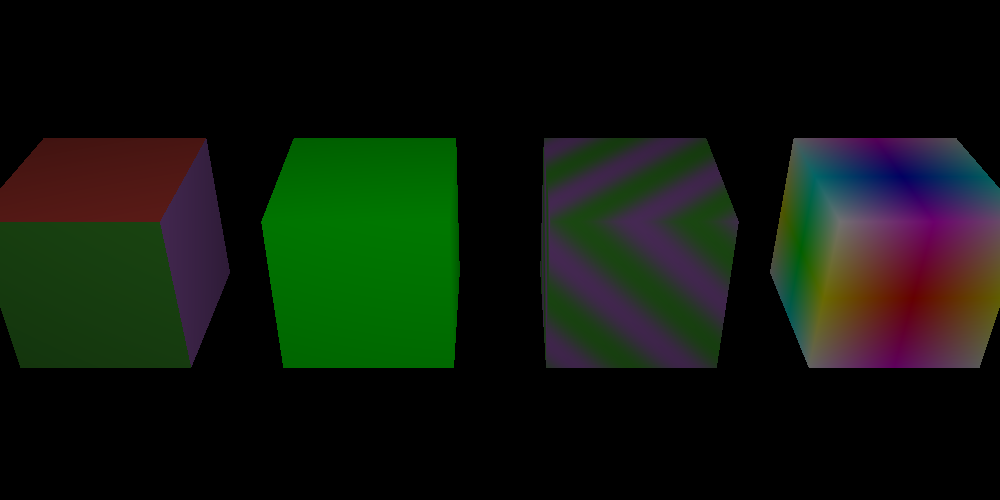

In [5]:
Rays.render!(scene)
view_canvas(camera)